<a href="https://colab.research.google.com/github/simoneminorr/clustering_assignment/blob/main/assignment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

In [1]:
! git clone https://github.com/ds3001f25/clustering_assignment.git

Cloning into 'clustering_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 221.98 KiB | 9.65 MiB/s, done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the  (𝑋1,𝑋2)  points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

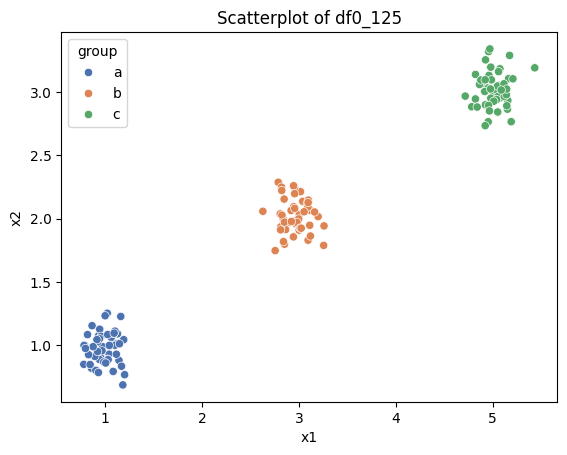

In [3]:
df125plot = sns.scatterplot(data=df0_125, x='x1', y='x2', hue='group', palette='deep')
plt.title('Scatterplot of df0_125')
plt.show()

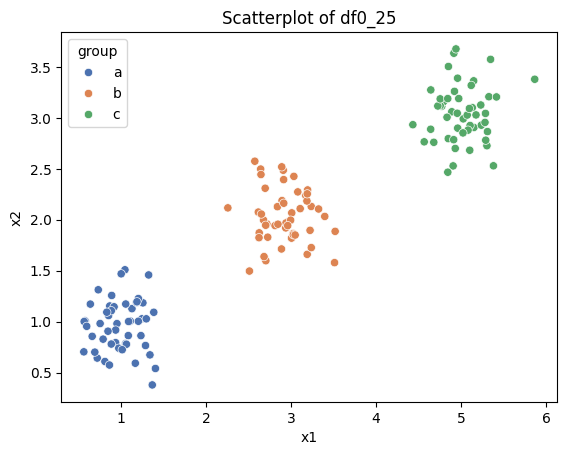

In [4]:
df25plot = sns.scatterplot(data=df0_25, x='x1', y='x2', hue='group', palette='deep')
plt.title('Scatterplot of df0_25')
plt.show()

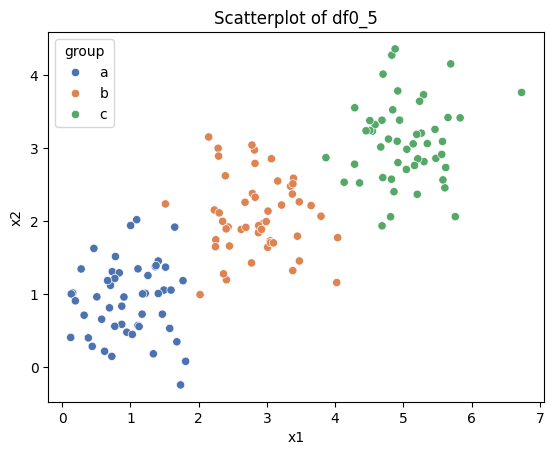

In [5]:
df5plot = sns.scatterplot(data=df0_5, x='x1', y='x2', hue='group', palette='deep')
plt.title('Scatterplot of df0_5')
plt.show()

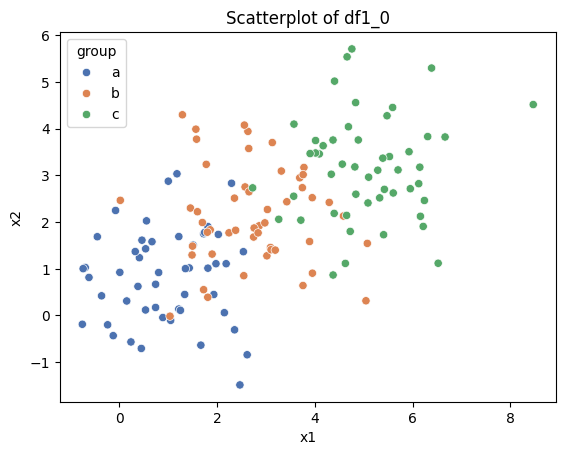

In [6]:
df1plot = sns.scatterplot(data=df1_0, x='x1', y='x2', hue='group', palette='deep')
plt.title('Scatterplot of df1_0')
plt.show()

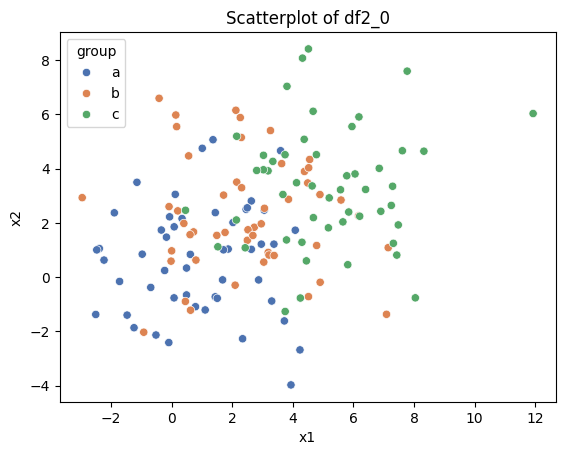

In [7]:
df2plot = sns.scatterplot(data=df2_0, x='x1', y='x2', hue='group', palette='deep')
plt.title('Scatterplot of df2_0')
plt.show()

A: the visual distinction of the clusters becomes less clear and more noising as the standard deviation of the cluster centers increase from 0.125 to 2.

3. Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  𝑘 . (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

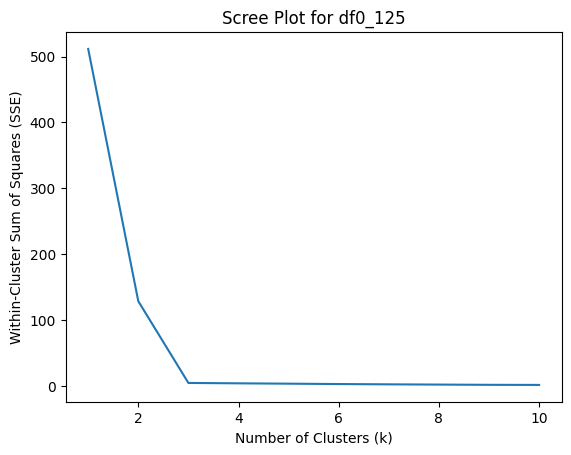

In [8]:
from sklearn.cluster import KMeans # Import kmc

x=df0_125.loc[:,['x1','x2']]
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

kbarr= [1,2,3,4,5,6,7,8,9,10]
SSE=[] # We'll store the training error here
for k in kbarr: # For indices from 0 to k_bar-1
  model = KMeans(n_clusters=k, max_iter=300, n_init = 10, random_state=0) # Create a model for k
  model = model.fit(x) # Fit the model
  SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=kbarr, y=SSE) # Create scree plot
scree_plot.set_title('Scree Plot for df0_125') # Set title
scree_plot.set_xlabel('Number of Clusters (k)') # Set xlabel
scree_plot.set_ylabel('Within-Cluster Sum of Squares (SSE)') # Set ylabel
plt.show() # Display the plot

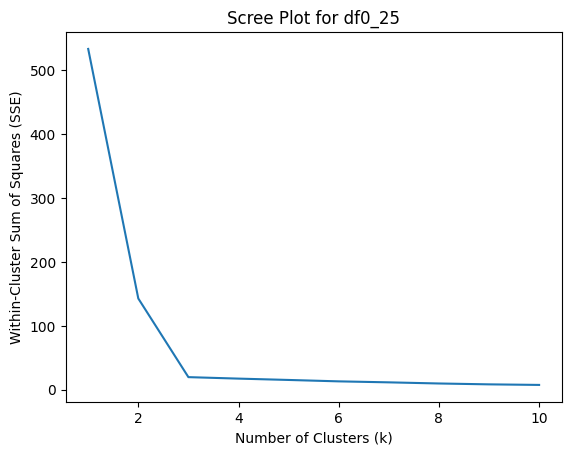

In [9]:
x=df0_25.loc[:,['x1','x2']]
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

kbarr= [1,2,3,4,5,6,7,8,9,10]
SSE=[] # We'll store the training error here
for k in kbarr: # For indices from
  model = KMeans(n_clusters=k, max_iter=300, n_init = 10, random_state=0) # Create a model
  model = model.fit(x) # Fit the model
  SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE

screeplot= sns.lineplot(x=kbarr, y=SSE) # Create scree plot
screeplot.set_title('Scree Plot for df0_25') # Set title
screeplot.set_xlabel('Number of Clusters (k)') # Set xlabel
screeplot.set_ylabel('Within-Cluster Sum of Squares (SSE)') # Set ylabel
plt.show() # Display the plot

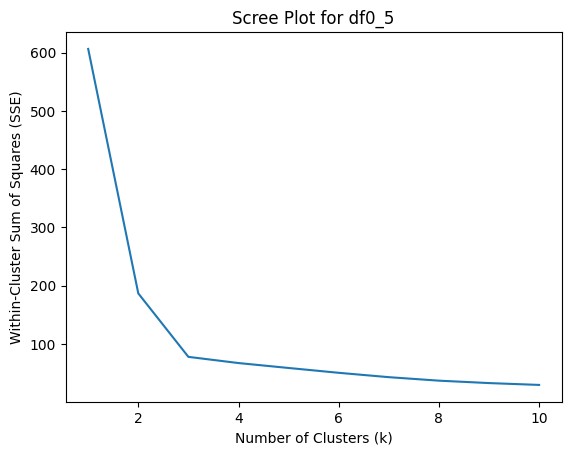

In [10]:
x=df0_5.loc[:,['x1','x2']]
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

kbarr= [1,2,3,4,5,6,7,8,9,10]
SSE=[] # We'll store the training error here
for k in kbarr:
  model = KMeans(n_clusters=k, max_iter=300, n_init = 10, random_state=0) # Create a model
  model = model.fit(x) # Fit the model
  SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE

screeplot= sns.lineplot(x=kbarr, y=SSE) # Create scree plot
screeplot.set_title('Scree Plot for df0_5') # Set title
screeplot.set_xlabel('Number of Clusters (k)') # Set xlabel
screeplot.set_ylabel('Within-Cluster Sum of Squares (SSE)') # Set ylabel
plt.show() # Display the plot

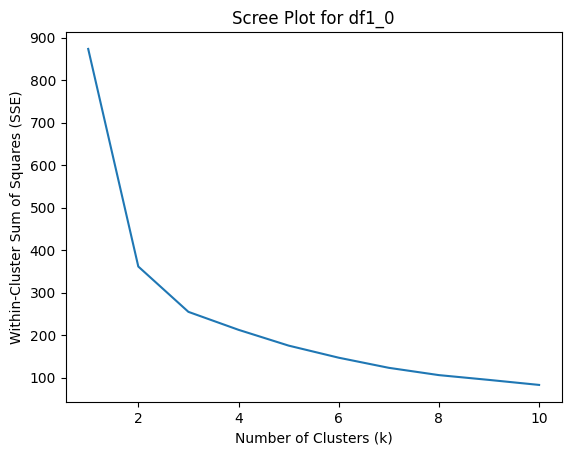

In [11]:
x=df1_0.loc[:,['x1','x2']]
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

kbarr= [1,2,3,4,5,6,7,8,9,10]
SSE=[] # We'll store the training
for k in kbarr:
  model = KMeans(n_clusters=k, max_iter=300, n_init = 10, random_state=0) # Create a model
  model = model.fit(x) # Fit the model
  SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE

screeplot= sns.lineplot(x=kbarr, y=SSE) # Create scree
screeplot.set_title('Scree Plot for df1_0') # Set title
screeplot.set_xlabel('Number of Clusters (k)') # Set xlabel
screeplot.set_ylabel('Within-Cluster Sum of Squares (SSE)') # Set ylabel
plt.show() # Display the plot

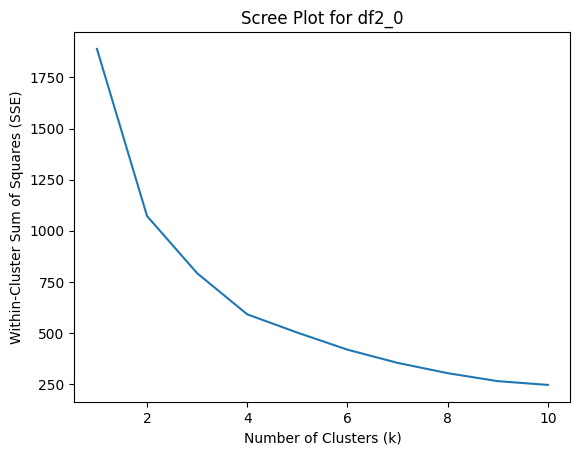

In [12]:
x=df2_0.loc[:,['x1','x2']]
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

kbarr= [1,2,3,4,5,6,7,8,9,10]
SSE=[] # We'll store the training error here
for k in kbarr:
  model = KMeans(n_clusters=k, max_iter=300, n_init = 10, random_state=0) # Create a
  model = model.fit(x) # Fit the model
  SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE

screeplot= sns.lineplot(x=kbarr, y=SSE) # Create scree
screeplot.set_title('Scree Plot for df2_0') # Set title
screeplot.set_xlabel('Number of Clusters (k)') # Set xlabel
screeplot.set_ylabel('Within-Cluster Sum of Squares (SSE)') # Set ylabel
plt.show() # Display the plot

The noiser the plot due to the increasing standard deviation of cluster center, the less clear the elbow is on the scree plot which makes it more difficult to identify the optimal k. When the standard deviation was 0.125, the clusters were small and you can use the elbow method to clearly identified that the optimal k is 2 because that is a significantly steep drop, however with a std. dev. of 2, there is a very noisy plot and the drop for the scree plot is not as significant so it is unclear if the optimal k is 2 or 3.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

A: The elbow of the scree plot is the distinct bend in the line due to a drop. This elbow represents the optimal number of clusters, k. When k increases, it divides the clusters into more and more groups. The comes a point where the addition of more clusters only tells us more about the plot marginally. The elbow on the scree plot represents this point where there is minimal gain for improvememt of the visualization by adding more cluster groups. At this point, any more points would be overfitting and the graph would be too noisy. However, if we left k at 1, meaning on large group, there is a risk of underfitting where there is not good generalizations.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [13]:
cd clustering_assignment

/content/clustering_assignment


1. Load the 2022 election cycle fundraising.csv file in the ./data folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, Raised, the total amount they spent, Spent, their available Cash on Hand, and their Debts. The variables denominated in dollars are messy and require cleaning. How do you handle it?

In [14]:
electioncyclefundraising = pd.read_csv('data/2022 election cycle fundraising.csv')

In [15]:
electioncyclefundraising.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [16]:
electioncyclefundraising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         537 non-null    int64 
 1   Member        537 non-null    object
 2   Party         537 non-null    object
 3   State         537 non-null    object
 4   Chamber       537 non-null    object
 5   Raised        537 non-null    object
 6   Spent         537 non-null    object
 7   Cash on Hand  537 non-null    object
 8   Debts         537 non-null    object
dtypes: int64(1), object(8)
memory usage: 37.9+ KB


In [17]:
electioncyclefundraising.describe()

,index
count,537.000000
mean,268.000000
std,155.162818
min,0.000000
25%,134.000000
50%,268.000000
75%,402.000000
max,536.000000


In [18]:
#to handle the commas and $ that are making the numbers show up as objects, I have replace both symbols with nothing so they can be read as floats
electioncyclefundraising['Raised']= electioncyclefundraising['Raised'].str.replace('$','').str.replace(',','').astype(float)
electioncyclefundraising['Spent']= electioncyclefundraising['Spent'].str.replace('$','').str.replace(',','').astype(float)
electioncyclefundraising['Cash on Hand']= electioncyclefundraising['Cash on Hand'].str.replace('$','').str.replace(',','').astype(float)
electioncyclefundraising['Debts']= electioncyclefundraising['Debts'].str.replace('$','').str.replace(',','').astype(float)

In [19]:
electioncyclefundraising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         537 non-null    int64  
 1   Member        537 non-null    object 
 2   Party         537 non-null    object 
 3   State         537 non-null    object 
 4   Chamber       537 non-null    object 
 5   Raised        537 non-null    float64
 6   Spent         537 non-null    float64
 7   Cash on Hand  537 non-null    float64
 8   Debts         537 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 37.9+ KB


2. Max-min normalize Raised and Spent. Use a scree plot to determine the optimal number of clusters for the  𝑘  means clustering algorithm. Make a scatter plot of Raised against Spent and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.

In [20]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

electioncyclefundraising['Raised_scaled'] = maxmin(electioncyclefundraising['Raised'])
electioncyclefundraising['Spent_scaled'] = maxmin(electioncyclefundraising['Spent'])

electioncyclefundraising.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_scaled,Spent_scaled
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0.103512,0.098074
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0.040686,0.016371
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,0.254404,0.183753
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0.029527,0.015449
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0.034148,0.021915


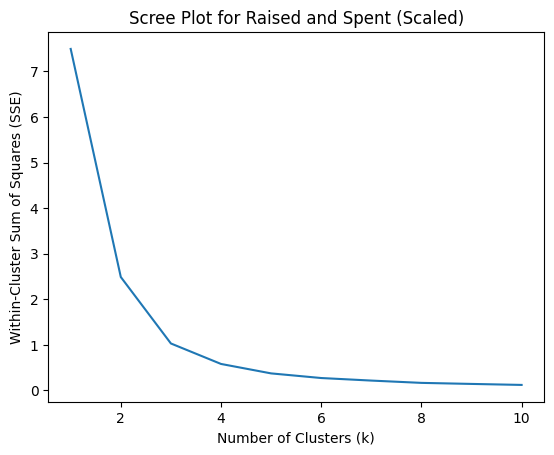

In [21]:
from sklearn.cluster import KMeans # Import kmc
import seaborn as sns # Import seaborn for plotting
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Prepare data for clustering
X = electioncyclefundraising[['Raised_scaled', 'Spent_scaled']] # Define X

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE) # Create scree plot
scree_plot.set_title('Scree Plot for Raised and Spent (Scaled)') # Set title
scree_plot.set_xlabel('Number of Clusters (k)') # Set xlabel
scree_plot.set_ylabel('Within-Cluster Sum of Squares (SSE)') # Set ylabel
plt.show() # Display the plot

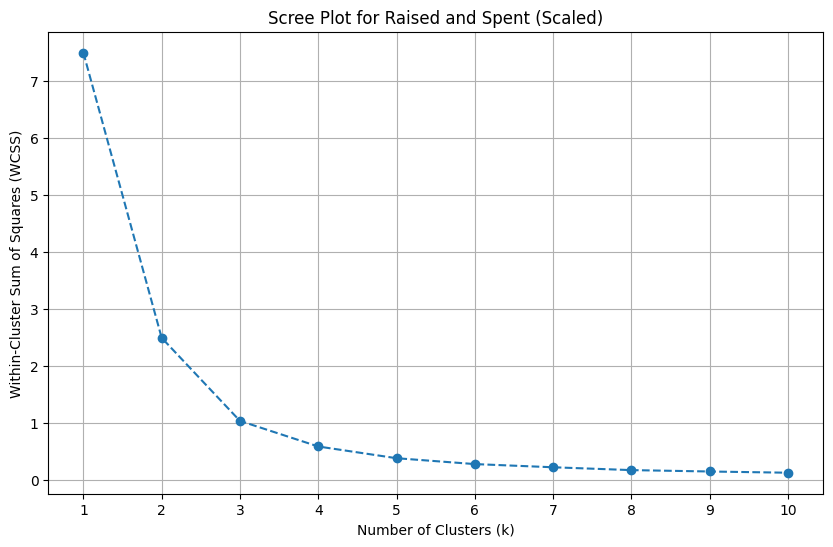

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare data for clustering
X = electioncyclefundraising[['Raised_scaled', 'Spent_scaled']]

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11): # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Scree Plot for Raised and Spent (Scaled)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

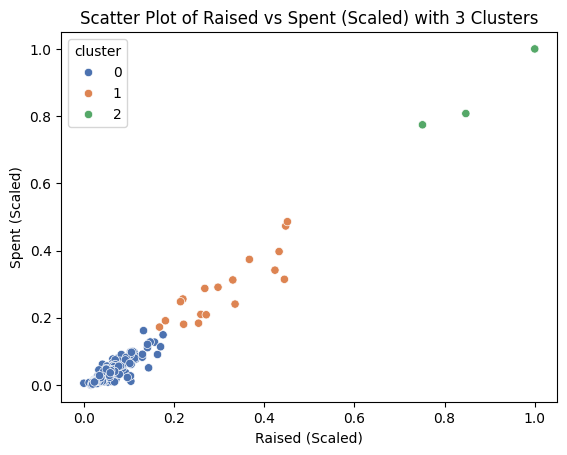

In [23]:
# Prepare data for clustering
X = electioncyclefundraising[['Raised_scaled', 'Spent_scaled']] # Define X for clustering function

# Choose the optimal number of clusters (k) based on elbow method where the reduction is much larger
# Either k=2 or k=3. Let's go with k=3.
optimal_k = 3

# Perform k-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
electioncyclefundraising['cluster'] = kmeans.fit_predict(X)

#make a scatterplot
electionscatterplot = sns.scatterplot(data=electioncyclefundraising, x='Raised_scaled', y='Spent_scaled', hue='cluster', palette='deep')
plt.title(f'Scatter Plot of Raised vs Spent (Scaled) with {optimal_k} Clusters')
plt.xlabel('Raised (Scaled)')
plt.ylabel('Spent (Scaled)')
plt.show()

A small cluster is seen as a tightly packed group of points which conveys great similarlity between amount of money raised and spent. The politicans who raised the least spent the least which makes sense because you cannot spend money you do not have. There are numerous politicans who make up this section, including representative John Lamb, Asa Palagi, Seth Pederson and more from the House and the Senate who did not raise any money or an insignificant amount compared to the other runners.

Citing: https://www.fec.gov/data/raising-bythenumbers/?election_year=2022&office=H

In [24]:
electioncyclefundraising.groupby('cluster').describe()

index                                                               \
         count        mean         std    min     25%    50%     75%    max   
cluster                                                                       
0        516.0  265.251938  154.848571    0.0  132.75  262.5  398.25  536.0   
1         18.0  320.333333  155.327358    2.0  268.25  342.5  435.00  500.0   
2          3.0  426.666667   91.882171  340.0  378.50  417.0  470.00  523.0   

        Raised                ... Raised_scaled          Spent_scaled  \
         count          mean  ...           75%      max        count   
cluster                       ...                                       
0        516.0  2.399054e+06  ...      0.051307  0.17576        516.0   
1         18.0  2.593003e+07  ...      0.409696  0.45154         18.0   
2          3.0  7.480175e+07  ...      0.923605  1.00000          3.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.024377  0.023882  0.000000  0.009346  0.015541  0.030506  0.161599  
1        0.287008  0.096788  0.172107  0.209130  0.271478  0.334749  0.485913  
2        0.860647  0.121845  0.774181  0.790971  0.807760  0.903880  1.000000  

[3 rows x 56 columns]

3. Repeat part 2, but for Cash on Hand and Debts. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.

In [25]:
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

electioncyclefundraising['Cash on Hand_scaled'] = maxmin(electioncyclefundraising['Cash on Hand'])
electioncyclefundraising['Debts_scaled'] = maxmin(electioncyclefundraising['Debts'])

electioncyclefundraising.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_scaled,Spent_scaled,cluster,Cash on Hand_scaled,Debts_scaled
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0.103512,0.098074,0,0.040154,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0.040686,0.016371,0,0.111166,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,0.254404,0.183753,1,0.920268,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0.029527,0.015449,0,0.030150,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0.034148,0.021915,0,0.050962,0.0


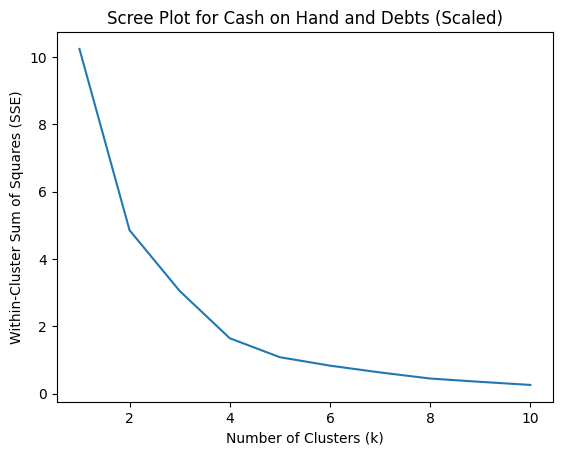

In [26]:
Z= electioncyclefundraising[['Cash on Hand_scaled', 'Debts_scaled']]

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

# Create a scree plot:
k_bar=10
SSE=[] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(Z) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE) # Create scree plot
scree_plot.set_title('Scree Plot for Cash on Hand and Debts (Scaled)') # Set title
scree_plot.set_xlabel('Number of Clusters (k)') # Set xlabel
scree_plot.set_ylabel('Within-Cluster Sum of Squares (SSE)') # Set ylabel
plt.show() # Display the plot

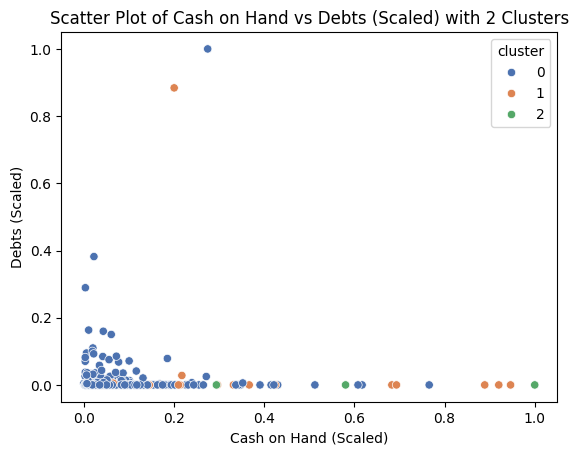

In [27]:
Y= electioncyclefundraising[['Cash on Hand_scaled', 'Debts_scaled']]

optimalk= 2

electionscatter = sns.scatterplot(data=electioncyclefundraising, x='Cash on Hand_scaled', y='Debts_scaled', hue='cluster', palette='deep')
plt.title(f'Scatter Plot of Cash on Hand vs Debts (Scaled) with {optimalk} Clusters')
plt.xlabel('Cash on Hand (Scaled)')
plt.ylabel('Debts (Scaled)')
plt.show()

Seems as though most politicans who are low on cash on hand have low debts, but it seems like most politicans have low to no debt anyway so there is not a clear small cluster.

4. Use  𝑘  means clustering with all four numeric variables. How do your results compare to the previous two parts?

In [35]:
from sklearn.cluster import KMeans

# Prepare data for clustering (using the scaled data from cell GXlOmq_x_wHK)
X = electioncyclefundraising.loc[ : , ['Raised_scaled','Spent_scaled', 'Cash on Hand_scaled', 'Debts_scaled'] ]

# Choose the optimal number of clusters (k) based on the scree plot in cell 6179fffe
# Let's assume an optimal k = 3 based on the elbow.
optimal_k = 3

# Perform k-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
electioncyclefundraising['cluster_all_vars'] = kmeans.fit_predict(X)

# Display the first few rows with the new cluster assignments
display(electioncyclefundraising.head())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_scaled,Spent_scaled,cluster,Cash on Hand_scaled,Debts_scaled,cluster_all_vars
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0.103512,0.098074,0,0.040154,0.0,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0.040686,0.016371,0,0.111166,0.0,0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,0.254404,0.183753,1,0.920268,0.0,1
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0.029527,0.015449,0,0.030150,0.0,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0.034148,0.021915,0,0.050962,0.0,0


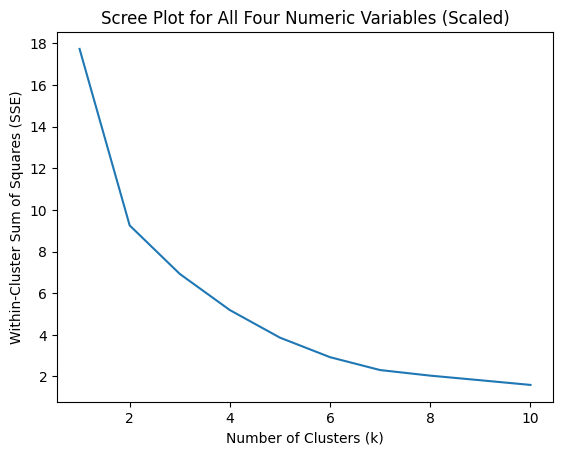

In [32]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a scree plot:
k_bar = 10
SSE = [] # Store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model using the scaled data from cell GXlOmq_x_wHK
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE) # Create scree plot
scree_plot.set_title('Scree Plot for All Four Numeric Variables (Scaled)') # Set title
scree_plot.set_xlabel('Number of Clusters (k)') # Set xlabel
scree_plot.set_ylabel('Within-Cluster Sum of Squares (SSE)') # Set ylabel
plt.show() # Display the plot

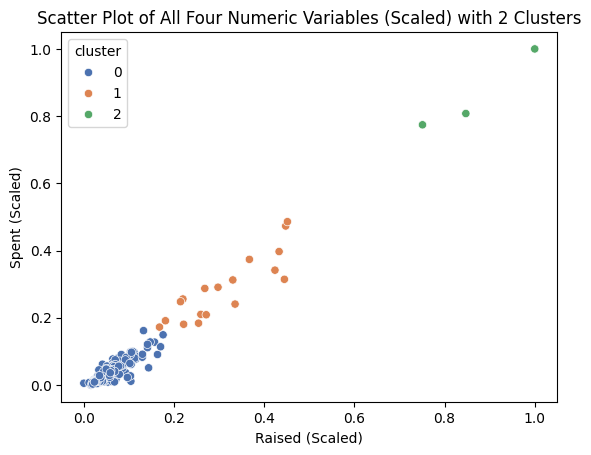

In [31]:
Z = electioncyclefundraising[['Raised_scaled', 'Spent_scaled', 'Cash on Hand_scaled', 'Debts_scaled']]
optimalk = 2

electionscatter = sns.scatterplot(data=electioncyclefundraising, x='Raised_scaled', y='Spent_scaled', hue='cluster', palette='deep')
plt.title(f'Scatter Plot of All Four Numeric Variables (Scaled) with {optimalk} Clusters')
plt.xlabel('Raised (Scaled)')
plt.ylabel('Spent (Scaled)')
plt.show()

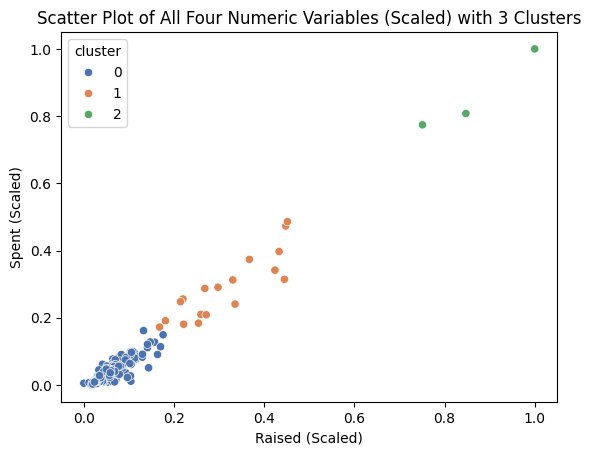

In [34]:
Z = electioncyclefundraising[['Raised_scaled', 'Spent_scaled', 'Cash on Hand_scaled', 'Debts_scaled']]
optimlk = 3

electionscatter = sns.scatterplot(data=electioncyclefundraising, x='Raised_scaled', y='Spent_scaled', hue='cluster', palette='deep')
plt.title(f'Scatter Plot of All Four Numeric Variables (Scaled) with {optimlk} Clusters')
plt.xlabel('Raised (Scaled)')
plt.ylabel('Spent (Scaled)')
plt.show()

In [39]:
Z.describe()

,Raised_scaled,Spent_scaled,Cash on Hand_scaled,Debts_scaled
count,537.000000,537.000000,537.000000,537.000000
mean,0.056596,0.037852,0.081267,0.009537
std,0.083859,0.083362,0.122833,0.063347
min,0.000000,0.000000,0.000000,0.000000
25%,0.026710,0.009643,0.021011,0.000000
50%,0.035440,0.016321,0.044858,0.000000
75%,0.053961,0.032991,0.087146,0.000000
max,1.000000,1.000000,1.000000,1.000000


A: These results are not as easy to see because scatterplots only have two axises, so I was unable to plot all four numeric variables. However, in the table I can see that people tend to have raised more than they have spent and therefor have less debt and more ample cash on hand.

5. Did the  𝑘 -MC algorithm find useful patterns for you in analyzing the election?

A: The k-mC algorithm found some pattern for me to analyze the election in regards to money. The trend that seems to be true is that most canidiates will raise more than they spend so they have more cash on hand and less debt. However, this is relative for each politican. Most politicans have raised very little, spent very little, have very little money on hand, and have no debt. And a large portion of those politicans are at $0 based on the websites I have found. It seems more people run than who actually campaign and those who run and campaign garner more support and more money as a result. This trend seems to be intutive because the more popular a canidate is, the more likely someone is to support them.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?